In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homework.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Основные сведения о датафрейме

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


Оставим нужные нам данные

In [28]:
df[['crim', 'medv']].head()

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.03237,33.4
3,0.06905,36.2
4,0.08829,22.9


In [21]:
crim = df['crim']
medv = df['medv']
crim = np.array(crim).reshape(-1,1)
medv = np.array(medv).reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Посмотрим, как зависит цена домов от уровня преступности

Разделим на 80% тренировочных и на 20% тестовых

In [23]:
from sklearn.model_selection import train_test_split

# x = crim,
# y = medv
X_train, X_test, y_train, y_test = train_test_split(
    crim,
    medv,
    test_size = 0.2
)

Обучим модель с помощью fit() метода

In [24]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим предсказания модели на тестируемых данных

In [25]:
predicted_y = model.predict(X_test)

Посчитаем ошибку модели

In [26]:
model.score(X_test, y_test)

0.07071587736397433

model.score - подсчет среднеквадратичной ошибки

Построим график линейной регресии

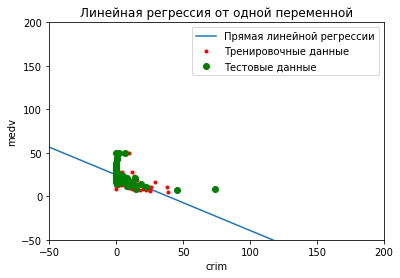

In [27]:
plt.xlabel('crim')
plt.ylabel('medv')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Исходя из графика, можно сделать вывод, что чем выше преступность в районе, тем ниже цена домов